<a href="https://colab.research.google.com/github/revindaamalias/SCIFEST/blob/main/face_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
w_mask_f = os.listdir('/content/drive/MyDrive/mask_detection/with_mask')
wo_mask_f = os.listdir('/content/drive/MyDrive/mask_detection/without_mask')
print('Jumlah foto bermasker:', len(w_mask_f))
print('Jumlah foto tanpa bermasker:', len(wo_mask_f))

Jumlah foto bermasker: 66
Jumlah foto tanpa bermasker: 132


In [4]:
w_mask_label = [1]*len(w_mask_f)
wo_mask_label = [0]*len(wo_mask_f)
labels = w_mask_label + wo_mask_label

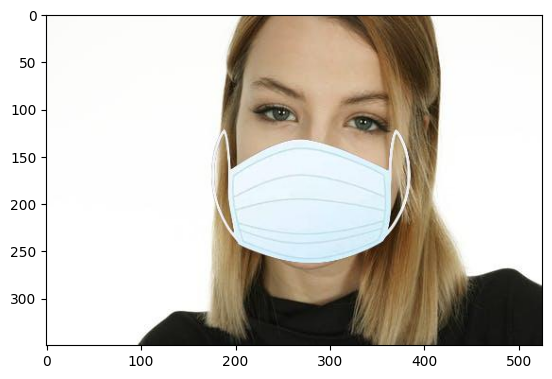

In [5]:
img = mpimg.imread('/content/drive/MyDrive/mask_detection/with_mask/1-with-mask.jpg')
imgplot = plt.imshow(img)

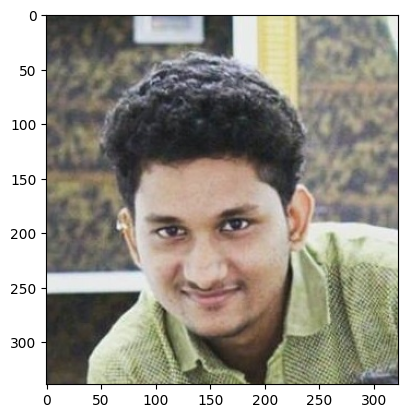

In [6]:
img = mpimg.imread('/content/drive/MyDrive/mask_detection/without_mask/326.jpg')
imgplot = plt.imshow(img)

In [9]:
data = []
path_w_mask = '/content/drive/MyDrive/mask_detection/with_mask/'
for img_file in w_mask_f:
    image = Image.open(path_w_mask + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [10]:
path_w_mask = '/content/drive/MyDrive/mask_detection/without_mask/'

for img_file in wo_mask_f:
    image = Image.open(path_w_mask + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [11]:
print(len(data))
# print(data[0])
# print(type(data[0]))
print(data[0].shape)

198
(128, 128, 3)


In [12]:
X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

(198, 128, 128, 3)
(198,)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,test_size=0.2, random_state=2
    )

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(198, 128, 128, 3) (158, 128, 128, 3) (40, 128, 128, 3)


In [15]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [16]:
# X_train_scaled[0]

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
jml_class = 2

model = keras.Sequential()

model.add(
    keras.layers.Conv2D(
        32,
        kernel_size = (3,3),
        activation='relu',
        input_shape = (128,128,3)
        )
    )
model.add(
    keras.layers.MaxPooling2D(
        pool_size=(2,2)
    )
)
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size = (3,3),
        activation='relu',
        input_shape = (128,128,3)
        )
    )
model.add(
    keras.layers.MaxPooling2D(
        pool_size=(2,2)
    )
)
model.add(
    keras.layers.Flatten()
)
model.add(
    keras.layers.Dense(
        128,
        activation='relu'
        )
)
model.add(
    keras.layers.Dropout(0.5)
)
model.add(
    keras.layers.Dense(
        64,
        activation='relu'
        )
)
model.add(
    keras.layers.Dropout(0.5)
)

model.add(
    keras.layers.Dense(jml_class, activation='sigmoid')
    # keras.layers.Dense(jml_class, activation='relu')
)

In [19]:
# compile neural network

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['acc']
    )

In [20]:
# mulai training model

rekaman_training = model.fit(
    X_train_scaled, Y_train, validation_split=0.1, epochs=5
)

Epoch 1/5
5/5 [==============================] - 5s 829ms/step - loss: 1.7535 - acc: 0.6338 - val_loss: 1.0192 - val_acc: 0.5625
Epoch 2/5
5/5 [==============================] - 3s 659ms/step - loss: 0.9886 - acc: 0.5915 - val_loss: 0.7070 - val_acc: 0.5625
Epoch 3/5
5/5 [==============================] - 2s 432ms/step - loss: 0.6170 - acc: 0.6972 - val_loss: 0.7387 - val_acc: 0.5625
Epoch 4/5
5/5 [==============================] - 2s 449ms/step - loss: 0.6134 - acc: 0.7113 - val_loss: 0.8045 - val_acc: 0.5625
Epoch 5/5
5/5 [==============================] - 2s 434ms/step - loss: 0.6101 - acc: 0.7113 - val_loss: 0.6998 - val_acc: 0.5625


In [21]:
loss, accur = model.evaluate(X_test_scaled, Y_test)
print('Akurasi Test :', accur)

2/2 [==============================] - 0s 38ms/step - loss: 0.7416 - acc: 0.5000
Akurasi Test : 0.5


1/1 [==============================] - 0s 97ms/step
[[0.5509206  0.41684878]]
0
Memakai masker


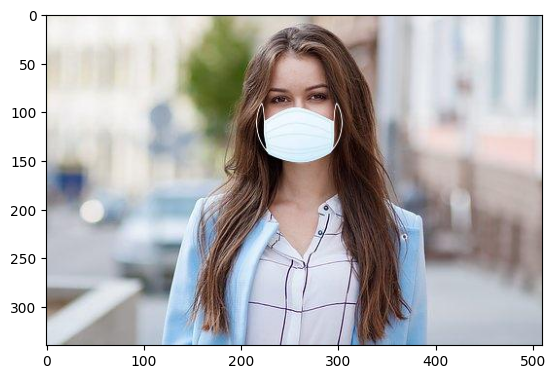

In [23]:
import cv2

# path_gambar = input('Pilih foto yang akan diprediksi:')
input_gambar = cv2.imread('/content/drive/MyDrive/mask_detection/with_mask/3-with-mask.jpg')
# input_gambar = cv2.imread('./pp.png')
# input_gambar = cv2.imread('./pp2.jpg')

from IPython.display import Image
Image(filename='/content/drive/MyDrive/mask_detection/with_mask/3-with-mask.jpg')

img = mpimg.imread('/content/drive/MyDrive/mask_detection/with_mask/3-with-mask.jpg')
imgplot = plt.imshow(img)

input_gambar_resized = cv2.resize(input_gambar,(128,128))
input_gambar_scaled = input_gambar_resized/255
input_gambar_reshaped = np.reshape(input_gambar_scaled, [1,128,128,3])
input_prediction = model.predict(input_gambar_reshaped)
print(input_prediction)

input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)
if (input_prediction_label == 0):
    print('Memakai masker')
else:
    print('Tidak masker')

1/1 [==============================] - 0s 24ms/step
[[0.5735572  0.40186504]]
0
Memakai masker


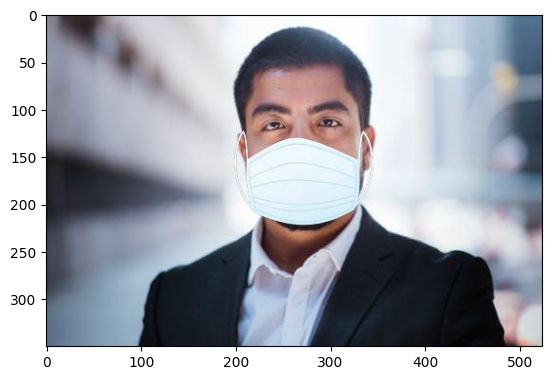

In [42]:
import cv2

# path_gambar = input('Pilih foto yang akan diprediksi:')
# input_gambar = cv2.imread('./dlpng.png')
input_gambar = cv2.imread('/content/drive/MyDrive/mask_detection/masks2.0/masks/train/1/13-with-mask.jpg')
# input_gambar = cv2.imread('./pp2.jpg')

# cv2.imshow('Output',input_gambar)
# cv2.waitKey(2000)
# cv2.destroyAllWindows()

img = mpimg.imread('/content/drive/MyDrive/mask_detection/masks2.0/masks/train/1/13-with-mask.jpg')
imgplot = plt.imshow(img)

input_gambar_resized = cv2.resize(input_gambar,(128,128))
input_gambar_scaled = input_gambar_resized/255
input_gambar_reshaped = np.reshape(input_gambar_scaled,[1,128,128,3])
input_prediction = model.predict(input_gambar_reshaped)
print(input_prediction)

input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)
if (input_prediction_label == 0):
    print('Memakai masker')
else:
    print('Tidak masker')